# Import Python Libraries

In [1]:
from datetime import datetime
import datetime
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
#%matplotlib inline

# Solar Power

# ML Model 1 - Temperature Prediction

In [2]:
# Convert the date and time columns to a pandas datetime object
solarlink = "https://github.com/ksuryachandra/Wind-Power-Forecast/blob/main/SolarDataProcessed.xlsx?raw=true"
SolarData = pd.read_excel(solarlink)
data = SolarData
nums = [str(s)[:2] for s in data.Time.dt.time]
data.insert(7,"Hour", nums)
months = [str(s)[5:7] for s in data.Time.dt.date]
days = [str(s)[8:10] for s in data.Time.dt.date]
originalyear = [str(st)[:4] for st in data.Time.dt.date]
data.insert(8,"Day", days)
data.insert(9,"Month", months)

In [3]:
# Train the model for Temperature Predictions

df = data.copy(deep=True)
df = df.fillna(method='ffill')
X = df.iloc[:,[-1,-2,-3]].values
y = df.iloc[:,-4].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

srf0 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
srf0.fit(X_train, y_train);
predictions = srf0.predict(df.iloc[:,[-1,-2,-3]].values)
print('Temperature Accuracy:', round(100-((abs(predictions - df.iloc[:,-4])/df.iloc[:,-4])*100).mean(), 2), '%.')

Temperature Accuracy: 97.34 %.


In [4]:
predictions[-24*5:]

array([18.35742   , 17.22795   , 15.63868833, 16.52506714, 16.40124095,
       15.3813919 , 14.84182333, 14.35481095, 18.45667976, 24.91059607,
       28.56451357, 30.69333667, 31.72326095, 32.65481524, 34.22607095,
       33.24717595, 33.74464643, 29.37799286, 25.17326071, 22.4657681 ,
       21.146075  , 19.44252024, 18.33795452, 17.33430524, 16.6063856 ,
       15.63782738, 15.55974095, 15.39489738, 14.54365452, 14.15113202,
       14.5146875 , 14.26678167, 19.35101286, 26.08859655, 29.28597214,
       32.34169333, 31.87675714, 34.01855429, 34.0624369 , 34.36819119,
       32.23679167, 29.75895226, 25.14757825, 21.94996143, 20.04656833,
       18.59529333, 18.57641833, 18.55254   , 16.6046906 , 15.58743476,
       15.4681025 , 15.38477405, 14.05385643, 13.25395274, 13.5032044 ,
       13.28712833, 20.83295905, 26.02955202, 30.69987405, 32.17844   ,
       31.4810619 , 34.12668   , 35.16167048, 34.269775  , 32.17106167,
       29.72779314, 25.66364111, 21.42412643, 20.47116571, 20.99

In [5]:
df.iloc[-24*5,0]

Timestamp('2023-01-27 00:00:00')

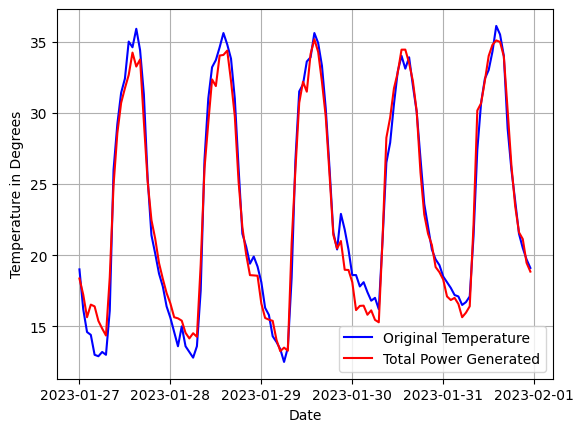

In [6]:
plt.figure()
plt.plot(df.iloc[-24*5:,0], df.iloc[-24*5:,-4], c= "blue", label='Original Temperature')
plt.plot(df.iloc[-24*5:,0], predictions[-24*5:], c = "red",  label='Total Power Generated')
plt.xlabel("Date")
plt.ylabel("Temperature in Degrees")
plt.grid()
plt.legend()
plt.show()

In [7]:
100-((abs(predictions - df.iloc[:,-4])/df.iloc[:,-4])*100).mean()

97.3446716186303

# ML model 2 - Prediction of all Influencing Parameters and Power

In [8]:
X = df.iloc[:,[-1,-2,-3,-4]].to_numpy()
y = df.iloc[:,-5].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

srf1 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
srf1.fit(X_train, y_train);

predictions = srf1.predict(data.iloc[:,[-1,-2,-3,-4]].values)
mod_df = df.iloc[:,[-1,-2,-3,-4]].copy(deep=True)
mod_df.insert(4,"Pred Mod Temp", predictions)
mod_df
# print('Module Temperature Accuracy:', round(100-((abs(predictions - data.iloc[:,-5].values)/data.iloc[:,-5].values)*100).mean(), 2), '%.')

,Month,Day,Hour,Amb Temp (°C),Pred Mod Temp
0,01,01,00,17.8,17.5504
1,01,01,01,17.6,17.3025
2,01,01,02,17.5,17.0730
3,01,01,03,16.5,15.7757
4,01,01,04,16.3,16.2557
...,...,...,...,...,...
9057,01,31,19,23.8,22.9045
9058,01,31,20,21.5,20.0007
9059,01,31,21,20.5,19.4724
9060,01,31,22,19.7,18.8374


In [9]:
X = df.iloc[:,[-1,-2,-3,-4,-5]].to_numpy()
y = df.iloc[:,-6].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

srf2 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
srf2.fit(X_train, y_train);

predictions = srf2.predict(mod_df.values)
POA_df = data.iloc[:,[-1,-2,-3,-4]].copy(deep=True)
POA_df.insert(4,"Pred Mod Temp", mod_df.iloc[:,-1])
POA_df.insert(5,"Pred POA", predictions)
POA_df

,Month,Day,Hour,Amb Temp (°C),Pred Mod Temp,Pred POA
0,01,01,00,17.8,17.5504,0.63296
1,01,01,01,17.6,17.3025,0.62992
2,01,01,02,17.5,17.0730,0.62736
3,01,01,03,16.5,15.7757,0.62960
4,01,01,04,16.3,16.2557,0.63088
...,...,...,...,...,...,...
9057,01,31,19,23.8,22.9045,0.48032
9058,01,31,20,21.5,20.0007,0.48032
9059,01,31,21,20.5,19.4724,0.48272
9060,01,31,22,19.7,18.8374,0.48864


In [10]:
X = df.iloc[:,[-1,-2,-3,-4,-5,-6]].to_numpy()
y = df.iloc[:,-7].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

srf3 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
srf3.fit(X_train, y_train);

predictions = srf3.predict(POA_df.values)
GHI_df = data.iloc[:,[-1,-2,-3,-4]].copy(deep=True)
GHI_df.insert(4,"Pred Mod Temp", mod_df.iloc[:,-1])
GHI_df.insert(5,"Pred POA", POA_df.iloc[:,-1])
GHI_df.insert(6,"Pred GHI", predictions)
GHI_df

,Month,Day,Hour,Amb Temp (°C),Pred Mod Temp,Pred POA,Pred GHI
0,01,01,00,17.8,17.5504,0.63296,0.32080
1,01,01,01,17.6,17.3025,0.62992,0.32592
2,01,01,02,17.5,17.0730,0.62736,0.32512
3,01,01,03,16.5,15.7757,0.62960,0.41456
4,01,01,04,16.3,16.2557,0.63088,0.37472
...,...,...,...,...,...,...,...
9057,01,31,19,23.8,22.9045,0.48032,0.34000
9058,01,31,20,21.5,20.0007,0.48032,0.31408
9059,01,31,21,20.5,19.4724,0.48272,0.32000
9060,01,31,22,19.7,18.8374,0.48864,0.32000


In [11]:
X = df.iloc[:,[-1,-2,-3,-4,-5,-6,-7]].to_numpy()
y = df.iloc[:,-8].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

srf4 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
srf4.fit(X_train, y_train);
predictions = srf4.predict(data.iloc[:,[-1,-2,-3,-4,-5,-6,-7]].values)
print('Solar Irradiance Accuracy:', round(100-((abs(predictions - data.iloc[:,-8].values)/data.iloc[:,-8].values)*100).mean(), 2), '%.')
predictions = srf4.predict(GHI_df.values)
Rad_df = GHI_df.copy(deep=True)
Rad_df.insert(7,"Pred Irradiance",predictions)
Rad_df

Solar Irradiance Accuracy: 99.96 %.


,Month,Day,Hour,Amb Temp (°C),Pred Mod Temp,Pred POA,Pred GHI,Pred Irradiance
0,01,01,00,17.8,17.5504,0.63296,0.32080,0.64
1,01,01,01,17.6,17.3025,0.62992,0.32592,0.64
2,01,01,02,17.5,17.0730,0.62736,0.32512,0.64
3,01,01,03,16.5,15.7757,0.62960,0.41456,0.64
4,01,01,04,16.3,16.2557,0.63088,0.37472,0.64
...,...,...,...,...,...,...,...,...
9057,01,31,19,23.8,22.9045,0.48032,0.34000,0.48
9058,01,31,20,21.5,20.0007,0.48032,0.31408,0.48
9059,01,31,21,20.5,19.4724,0.48272,0.32000,0.48
9060,01,31,22,19.7,18.8374,0.48864,0.32000,0.48


In [12]:
X = df.iloc[:,[-1,-2,-3,-4,-5,-6,-7,-8]].to_numpy()
y = df.iloc[:,-9].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

srf5 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
srf5.fit(X_train, y_train);

predictions = srf5.predict(Rad_df.values)
finale = Rad_df.copy(deep = True)
finale.insert(8,"Pred Power",predictions)
finale

,Month,Day,Hour,Amb Temp (°C),Pred Mod Temp,Pred POA,Pred GHI,Pred Irradiance,Pred Power
0,01,01,00,17.8,17.5504,0.63296,0.32080,0.64,0.0000
1,01,01,01,17.6,17.3025,0.62992,0.32592,0.64,0.0000
2,01,01,02,17.5,17.0730,0.62736,0.32512,0.64,0.0000
3,01,01,03,16.5,15.7757,0.62960,0.41456,0.64,0.0000
4,01,01,04,16.3,16.2557,0.63088,0.37472,0.64,0.0000
...,...,...,...,...,...,...,...,...,...
9057,01,31,19,23.8,22.9045,0.48032,0.34000,0.48,0.0546
9058,01,31,20,21.5,20.0007,0.48032,0.31408,0.48,0.0000
9059,01,31,21,20.5,19.4724,0.48272,0.32000,0.48,0.0000
9060,01,31,22,19.7,18.8374,0.48864,0.32000,0.48,0.0000


# Wind Power

# ML Model 3 - Wind Speed Prediction

In [13]:
windlink = "https://github.com/ksuryachandra/Wind-Power-Forecast/blob/main/WindDataProcessed.xlsx?raw=true"
wind_df = pd.read_excel(windlink)
future = wind_df.iloc[:,0]
mnth = [int(str(s)[5:7]) for s in future]
days = [int(str(s)[8:10]) for s in future]
hour = [int(str(s)[11:13]) for s in future]
wind_df["Month"] = mnth
wind_df["Day"] = days
wind_df["Hour"] = hour
wind_df

,Date-Time,Wind Speed (kmph),Relative Humidity (%),Temperature (Degrees),Pressure (kPa),Air Density (Kg/m3),Energy (MWh),Turbine Energy (MWh),Month,Day,Hour
0,2022-01-01 00:00:00,9.67009,51.74,17.8,101.24,1.21217,15626.43,6194.32,1,1,0
1,2022-01-01 01:00:00,11.72961,54.69,17.6,101.24,1.21301,27907.42,10867.15,1,1,1
2,2022-01-01 02:00:00,19.46890,54.77,17.5,101.26,1.21366,127680.88,49131.60,1,1,2
3,2022-01-01 03:00:00,19.43672,54.41,16.5,101.27,1.21797,127499.98,49253.24,1,1,3
4,2022-01-01 04:00:00,12.32494,52.99,16.3,101.23,1.21833,32518.01,12382.86,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...
8755,2022-12-31 19:00:00,14.15920,59.46,34.4,101.47,1.14935,46512.86,18474.91,12,31,19
8756,2022-12-31 20:00:00,15.89692,59.14,33.8,101.52,1.15216,65986.69,26922.57,12,31,20
8757,2022-12-31 21:00:00,16.10609,60.91,31.2,101.50,1.16178,69198.84,26385.52,12,31,21
8758,2022-12-31 22:00:00,19.32409,59.83,25.3,101.54,1.18521,121926.20,48563.21,12,31,22


In [14]:
# Predicts the Wind Speeds of next 7 days hourly rate
dataw = wind_df
X = dataw.iloc[:,[-3, -2, -1]].to_numpy()
y = dataw.iloc[:,1].to_numpy()
Y = y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

wrf0 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
wrf0.fit(X_train, y_train);
predictions0 = wrf0.predict(X_test)

predictions0 = wrf0.predict(dataw.iloc[:,[-3, -2, -1]].values)
print('Module Temperature Accuracy:', round(100-((abs(predictions0 - dataw.iloc[:,1].values)/dataw.iloc[:,1].values)*100).mean(), 2), '%.')

Module Temperature Accuracy: 93.12 %.


In [15]:
import datetime
import numpy as np

start_date = datetime.datetime(2022, 12, 1, 0)  # start date and time
end_date = datetime.datetime(2022, 12, 31, 23)  # end date and time
delta = datetime.timedelta(hours=1)  # hourly interval

dates = []
while start_date <= end_date:
    dates.append(start_date)
    start_date += delta
future = []
for date in dates:
    future.append(date)

mnth = [int(str(s)[5:7]) for s in future]
days = [int(str(s)[8:10]) for s in future]
hour = [str(s)[11:13] for s in future]

future_df = pd.DataFrame({"Month":mnth, "Day" :days, "hour": hour})
predictions1 = wrf0.predict(future_df.iloc[:,[0,1,2]].values)
future_df["Predicted Wind Speed (kmph)"] = predictions1
future_df.insert(0, "Date-Time", future)
future_df = future_df.drop(["Month", "Day", "hour"], axis = 1)
temp_output = future_df
temp_output

,Date-Time,Predicted Wind Speed (kmph)
0,2022-12-01 00:00:00,19.259456
1,2022-12-01 01:00:00,19.090817
2,2022-12-01 02:00:00,16.879327
3,2022-12-01 03:00:00,19.017865
4,2022-12-01 04:00:00,16.491381
...,...,...
739,2022-12-31 19:00:00,14.568224
740,2022-12-31 20:00:00,14.744989
741,2022-12-31 21:00:00,15.071567
742,2022-12-31 22:00:00,18.100140


In [16]:
compare_df = wind_df.iloc[-len(temp_output):,[0,1]].reset_index().drop(["index"], axis=1)
new_df = pd.merge(compare_df, temp_output, how= "inner", left_on = "Date-Time", right_on = "Date-Time")
new_df

,Date-Time,Wind Speed (kmph),Predicted Wind Speed (kmph)
0,2022-12-01 00:00:00,19.48499,19.259456
1,2022-12-01 01:00:00,19.67807,19.090817
2,2022-12-01 02:00:00,15.51076,16.879327
3,2022-12-01 03:00:00,20.25731,19.017865
4,2022-12-01 04:00:00,15.23723,16.491381
...,...,...,...
739,2022-12-31 19:00:00,14.15920,14.568224
740,2022-12-31 20:00:00,15.89692,14.744989
741,2022-12-31 21:00:00,16.10609,15.071567
742,2022-12-31 22:00:00,19.32409,18.100140


In [17]:
new_df["Error"] = abs(new_df["Wind Speed (kmph)"] - new_df["Predicted Wind Speed (kmph)"])/new_df["Wind Speed (kmph)"] * 100
new_df["Accuracy"] = 100 - new_df["Error"]
new_df

,Date-Time,Wind Speed (kmph),Predicted Wind Speed (kmph),Error,Accuracy
0,2022-12-01 00:00:00,19.48499,19.259456,1.157473,98.842527
1,2022-12-01 01:00:00,19.67807,19.090817,2.984301,97.015699
2,2022-12-01 02:00:00,15.51076,16.879327,8.823340,91.176660
3,2022-12-01 03:00:00,20.25731,19.017865,6.118507,93.881493
4,2022-12-01 04:00:00,15.23723,16.491381,8.230834,91.769166
...,...,...,...,...,...
739,2022-12-31 19:00:00,14.15920,14.568224,2.888750,97.111250
740,2022-12-31 20:00:00,15.89692,14.744989,7.246255,92.753745
741,2022-12-31 21:00:00,16.10609,15.071567,6.423177,93.576823
742,2022-12-31 22:00:00,19.32409,18.100140,6.333805,93.666195


In [18]:
print("Overall Accuracy of Wind Speed: " +str(round(new_df.iloc[:,-1].mean(),2))+ " %")

Overall Accuracy of Wind Speed: 95.05 %


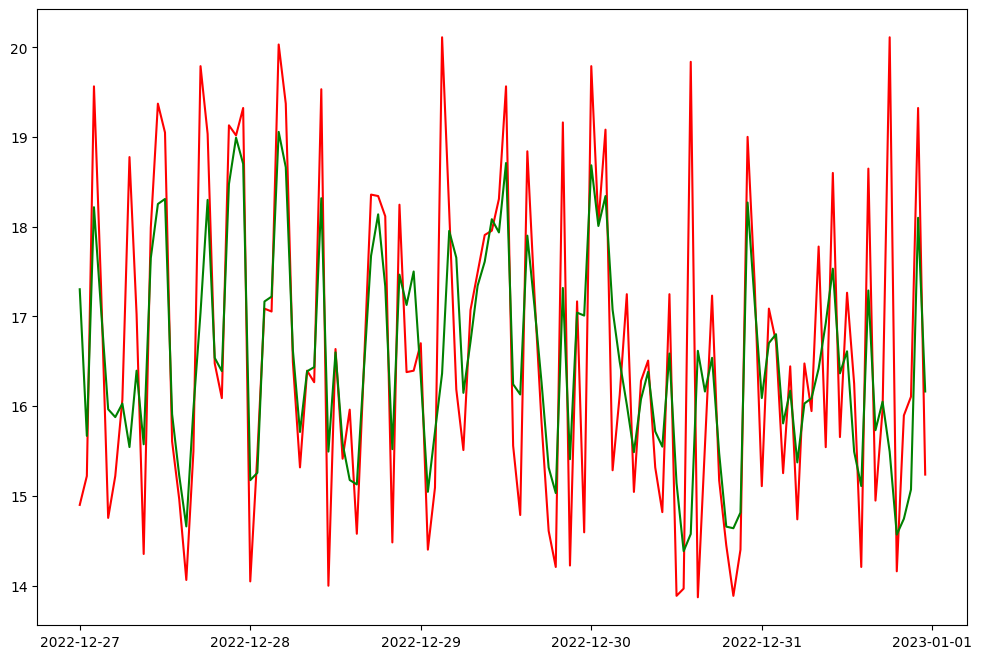

In [19]:
plt.figure(figsize=(12,8))
plt.plot(new_df.iloc[-24*5:,0], new_df.iloc[-24*5:,1], color = "red")
plt.plot(temp_output.iloc[-24*5:,0], temp_output.iloc[-24*5:,1], color = "green")

# ML model 4 - Prediction of all Influencing Parameters and Power

In [20]:
# Predicts the Wind Speeds of next 7 days hourly rate
dataw = wind_df
X = dataw.iloc[:,[-3, -2, -1, 1]].to_numpy()
y = dataw.iloc[:,2:8].to_numpy()
Y = y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

wrf1 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
wrf1.fit(X_train, y_train);
predictions2 = wrf1.predict(X_test)
errors = abs(predictions2 - y_test)
mape = 100 * (errors / y_test)
accuracyRandForest = 100 - np.mean(mape)
print('Accuracy:', round(accuracyRandForest, 2), '%.')

Accuracy: 94.71 %.


In [21]:
predictions2 = wrf1.predict(dataw.iloc[:,[-3, -2, -1, 1]].values)
print('Overall Accuracy:', round(100-((abs(predictions2 - dataw.iloc[:,2:8].values)/dataw.iloc[:,2:8].values)*100).mean(), 2), '%.')

Overall Accuracy: 97.43 %.


In [22]:
import datetime
import numpy as np

start_date = datetime.datetime(2022, 12, 1, 0)  # start date and time
end_date = datetime.datetime(2022, 12, 31, 23)  # end date and time
delta = datetime.timedelta(hours=1)  # hourly interval

dates = []
while start_date <= end_date:
    dates.append(start_date)
    start_date += delta
future = []
for date in dates:
    future.append(date)

year = [int(str(s)[:4]) for s in future]
mnth = [int(str(s)[5:7]) for s in future]
days = [int(str(s)[8:10]) for s in future]
hour = [int(str(s)[11:13]) for s in future]

future_df1 = pd.DataFrame({"Month":mnth, "Day" :days, "hour": hour, "Predictd Wind Speed": predictions1})

predictions3 = wrf1.predict(future_df1.iloc[:,[0,1,2,3]].values)

In [23]:
output_df = pd.DataFrame(predictions3, columns = dataw.columns[2:8])
output_df.insert(0, "Date_Time", future)
output_df.insert(1, "Predicted Windspeed", predictions1)
output_df

,Date_Time,Predicted Windspeed,Relative Humidity (%),Temperature (Degrees),Pressure (kPa),Air Density (Kg/m3),Energy (MWh),Turbine Energy (MWh)
0,2022-12-01 00:00:00,19.259456,62.97910,29.6797,102.10386,1.174844,119812.07915,46392.91104
1,2022-12-01 01:00:00,19.090817,62.75490,31.0920,100.74098,1.153849,114674.97289,44989.48384
2,2022-12-01 02:00:00,16.879327,61.30539,25.5023,101.23016,1.181137,81001.14886,32078.36837
3,2022-12-01 03:00:00,19.017865,60.82442,30.8015,100.85897,1.156464,114100.98219,44707.73734
4,2022-12-01 04:00:00,16.491381,58.01319,25.1185,101.40792,1.185056,75233.58869,29358.87903
...,...,...,...,...,...,...,...,...
739,2022-12-31 19:00:00,14.568224,58.75913,32.3043,101.00068,1.152343,50804.86247,20015.44614
740,2022-12-31 20:00:00,14.744989,61.57742,21.9734,100.76319,1.190315,54429.36861,21642.63986
741,2022-12-31 21:00:00,15.071567,63.59379,23.5243,101.13505,1.188452,58434.08585,23436.19136
742,2022-12-31 22:00:00,18.100140,62.00329,27.6515,101.09441,1.171788,98873.75830,38797.00479


In [24]:
diff_df = wind_df.iloc[-len(output_df):,:].reset_index().drop(["index"], axis=1)
diff_df

,Date-Time,Wind Speed (kmph),Relative Humidity (%),Temperature (Degrees),Pressure (kPa),Air Density (Kg/m3),Energy (MWh),Turbine Energy (MWh),Month,Day,Hour
0,2022-12-01 00:00:00,19.48499,59.85,34.7,102.52,1.16011,122350.10,47202.67,12,1,0
1,2022-12-01 01:00:00,19.67807,59.61,36.4,102.60,1.15464,125429.21,51062.23,12,1,1
2,2022-12-01 02:00:00,15.51076,59.81,36.8,102.72,1.15450,61418.29,24284.79,12,1,2
3,2022-12-01 03:00:00,20.25731,59.58,35.3,102.78,1.16079,137563.61,54337.63,12,1,3
4,2022-12-01 04:00:00,15.23723,60.44,33.8,102.82,1.16692,58852.34,23599.79,12,1,4
...,...,...,...,...,...,...,...,...,...,...,...
739,2022-12-31 19:00:00,14.15920,59.46,34.4,101.47,1.14935,46512.86,18474.91,12,31,19
740,2022-12-31 20:00:00,15.89692,59.14,33.8,101.52,1.15216,65986.69,26922.57,12,31,20
741,2022-12-31 21:00:00,16.10609,60.91,31.2,101.50,1.16178,69198.84,26385.52,12,31,21
742,2022-12-31 22:00:00,19.32409,59.83,25.3,101.54,1.18521,121926.20,48563.21,12,31,22


In [25]:
windcomp_df = pd.merge(output_df,diff_df, how = "inner",left_on="Date_Time", right_on = "Date-Time")
windcomp_df = windcomp_df.iloc[:,[0,1,3,7,8,9,11,15]]
windcomp_df["Accuracy"] = 100 - (abs(windcomp_df['Turbine Energy (MWh)_x']-windcomp_df['Turbine Energy (MWh)_y'])/windcomp_df['Turbine Energy (MWh)_y'])*100
windcomp_df[24*7:24*8]

,Date_Time,Predicted Windspeed,Temperature (Degrees)_x,Turbine Energy (MWh)_x,Date-Time,Wind Speed (kmph),Temperature (Degrees)_y,Turbine Energy (MWh)_y,Accuracy
168,2022-12-08 00:00:00,18.415681,28.4671,41266.42709,2022-12-08 00:00:00,18.79312,32.2,44275.29,93.204194
169,2022-12-08 01:00:00,18.260364,27.3646,39870.86885,2022-12-08 01:00:00,17.61855,33.9,35942.20,89.069481
170,2022-12-08 02:00:00,18.251193,27.2244,39723.30680,2022-12-08 02:00:00,17.71509,34.3,35552.08,88.267278
171,2022-12-08 03:00:00,18.874487,29.8243,44155.59095,2022-12-08 03:00:00,19.75852,34.2,51760.66,85.307241
172,2022-12-08 04:00:00,19.505714,31.0011,47981.30423,2022-12-08 04:00:00,19.99987,34.2,51227.37,93.663415
173,2022-12-08 05:00:00,19.269175,30.3395,46954.67088,2022-12-08 05:00:00,18.85748,31.0,43269.62,91.483515
174,2022-12-08 06:00:00,19.156239,23.9398,47108.54885,2022-12-08 06:00:00,19.71025,23.5,51474.25,91.518670
175,2022-12-08 07:00:00,17.076945,21.7487,33431.01973,2022-12-08 07:00:00,17.32893,20.4,36439.87,91.742972
176,2022-12-08 08:00:00,15.498757,20.0622,25377.43550,2022-12-08 08:00:00,14.30401,18.9,20073.27,73.575977
177,2022-12-08 09:00:00,17.063397,22.6740,33055.86394,2022-12-08 09:00:00,17.23239,18.0,33934.62,97.410444


In [26]:
windcomp_df.iloc[24*7:24*8,-1].mean()

90.61879836466234

In [27]:
errors = []
overall = []
for i in range(1,8):
  errors.append(100 - ((abs(output_df.iloc[:,i] - diff_df.iloc[:,i]) / diff_df.iloc[:,i])* 100).mean())
errors

[95.04951492432758,
 97.21066755430991,
 71.72381070580602,
 99.1610567281619,
 97.91076058318029,
 84.57848818481003,
 84.53970454295838]

In [28]:
sum(errors)/len(errors)

90.02485760336488

In [29]:
tempdates = [str(st)[:10] for st in diff_df["Date-Time"]]
diff_df.insert(1,"Date",tempdates)
current = diff_df.groupby(["Date"]).agg(Energy_per_Day_MJ = ("Turbine Energy (MWh)", "sum"))
current

,Energy_per_Day_MJ
Date,
2022-12-01,930775.70
2022-12-02,860231.27
2022-12-03,827561.75
2022-12-04,843445.59
2022-12-05,872786.80
2022-12-06,676308.38
2022-12-07,867915.81
2022-12-08,914449.30
2022-12-09,833742.46


In [30]:
tempdates = [str(st)[:10] for st in output_df["Date_Time"]]
output_df.insert(1,"Date",tempdates)
out = output_df.groupby(["Date"]).agg(Energy_per_Day_MJ = ("Turbine Energy (MWh)", "sum"))

In [31]:
out.insert(1,"Generated Energy", current)

In [32]:
out["Accuracy (%)"] = 100 - (abs(out.iloc[:,0] - out.iloc[:,1])/out.iloc[:,1])*100
out.head()

,Energy_per_Day_MJ,Generated Energy,Accuracy (%)
Date,,,
2022-12-01,855217.04204,930775.70,91.882184
2022-12-02,842553.43676,860231.27,97.944991
2022-12-03,797262.45904,827561.75,96.338727
2022-12-04,763126.13823,843445.59,90.477222
2022-12-05,842776.20956,872786.80,96.561521


In [33]:
out

,Energy_per_Day_MJ,Generated Energy,Accuracy (%)
Date,,,
2022-12-01,855217.04204,930775.70,91.882184
2022-12-02,842553.43676,860231.27,97.944991
2022-12-03,797262.45904,827561.75,96.338727
2022-12-04,763126.13823,843445.59,90.477222
2022-12-05,842776.20956,872786.80,96.561521
2022-12-06,687410.93064,676308.38,98.358360
2022-12-07,850151.61167,867915.81,97.953235
2022-12-08,893489.49315,914449.30,97.707931
2022-12-09,834398.74258,833742.46,99.921285


In [34]:
print("Overall accuracy: " + str(round(out.iloc[:,2].mean(),2)) + " %")

Overall accuracy: 96.59 %


# Energy Forecast for the Hybrid System

In [35]:
# Forecast from current date
# User_Start_date = datetime(datetime.now().year, datetime.now().month, datetime.now().day, 0)
# User_End_date = datetime(datetime.now().year, datetime.now().month, datetime.now().day, 0) + timedelta(days = 7, hours = 23)
# Pload = [90, 80, 84,	75, 110, 97, 115, 98]

In [36]:
#User Input
from datetime import datetime, timedelta
User_Start_date = datetime(2023, 7, 15, 0)
User_End_date = datetime(2023, 7, 21, 23)
Pload = [90, 80, 84,	75, 110, 97, 115]

In [37]:
#Solar Future prediction

start_date = User_Start_date  # start date and time
end_date = User_End_date  # end date and time
delta = timedelta(hours=1)  # hourly interval

dates = []
while start_date <= end_date:
    dates.append(start_date)
    start_date += delta
future = []
for date in dates:
    future.append(str(date))

year = [int(s[:4]) for s in future]
mnth = [int(s[5:7]) for s in future]
days = [int(s[8:10]) for s in future]
hour = [int(s[11:13]) for s in future]

future_df = pd.DataFrame({"Year":year, "Month":mnth, "Day" :days, "hour": hour})

predictions = srf0.predict(future_df.iloc[:,[1,2,3]].values)
pred_temp = future_df.iloc[:,:].copy(deep=True)
pred_temp.insert(0,"Date Time", future)
pred_temp.insert(1,"Predicted Temp", predictions)
temp_output = pd.DataFrame({"DataTime": pred_temp.iloc[:,0], "Temperature": pred_temp.iloc[:,1]})
pred_df = pred_temp.iloc[:,[-3,-2,-1,1]]
#pred_df = data[data.Time.dt.date == datetime.date(2022,5,22)].iloc[:,[-1,-2,-3,-4]]
mod_temp = srf1.predict(pred_df.values).tolist()
pred_df.insert(4,"Mod temp",mod_temp)
POA = srf2.predict(pred_df.values).tolist()
pred_df.insert(5,"POA",POA)
GHI = srf3.predict(pred_df.values).tolist()
pred_df.insert(6,"GHI",GHI)
Irrad = srf4.predict(pred_df.values).tolist()
pred_df.insert(7,"Irradiance",Irrad)
Power = srf5.predict(pred_df.values).tolist()
pred_df.insert(8,"SolarPower (MW)",Power)
pred_df.insert(0,"Date Time", future)
final_df = pred_df.iloc[:,[0,4,8,9]].copy(deep=True)
tempdates = [st[:10] for st in final_df["Date Time"]]
final_df.insert(1,"Date",tempdates)
Solarfuture = final_df.groupby(["Date"]).agg(Average_Power_MW = ("SolarPower (MW)", "sum"))
Solarfuture["Energy per day (MWh)"] = Solarfuture["Average_Power_MW"]*24
Solarfuture = Solarfuture.iloc[:,[1,0]]
Solarfuture

,Energy per day (MWh),Average_Power_MW
Date,,
2023-07-15,4.965720e+06,206904.9899
2023-07-16,4.377231e+06,182384.6126
2023-07-17,5.108712e+06,212863.0162
2023-07-18,4.514626e+06,188109.4048
2023-07-19,5.960687e+06,248361.9784
2023-07-20,6.927487e+06,288645.2825
2023-07-21,7.072003e+06,294666.7920


In [38]:
#Wind Future Prediction

start_date = User_Start_date  # start date and time
end_date = User_End_date  # end date and time
delta = timedelta(hours=1)  # hourly interval

dates = []
while start_date <= end_date:
    dates.append(start_date)
    start_date += delta
future1 = []
for date in dates:
    future1.append(date)

year = [int(str(s)[:4]) for s in future1]
mnth = [int(str(s)[5:7]) for s in future1]
days = [int(str(s)[8:10]) for s in future1]
hour = [int(str(s)[11:13]) for s in future1]

future_df2 = pd.DataFrame({"Month":mnth, "Day" :days, "hour": hour})

predictions3 = wrf0.predict(future_df2.iloc[:,[0,1,2]].values)
predictions3
future_df2["Predicted Wind Speed (kmph)"] = predictions3
predictions4 = wrf1.predict(future_df2.iloc[:,[0,1,2,3]].values)
future_output = pd.DataFrame(predictions4, columns = wind_df.columns[2:8])
future_output.insert(0,"Date-Time", future1)
future_output.insert(1, "Predicted Wind Speed", predictions3)
tempdates = [str(st)[:10] for st in future_output["Date-Time"]]
future_output.insert(1,"Date",tempdates)
Windfuture = future_output.groupby(["Date"]).agg(Energy_per_Day_MWh = ("Turbine Energy (MWh)", "sum"))
Windfuture["Avg_Power MW"] = Windfuture/(3600*24)
Windfuture

,Energy_per_Day_MWh,Avg_Power MW
Date,,
2023-07-15,2.703739e+06,31.293279
2023-07-16,2.848854e+06,32.972848
2023-07-17,2.686919e+06,31.098598
2023-07-18,2.710030e+06,31.366093
2023-07-19,2.811186e+06,32.536876
2023-07-20,2.743422e+06,31.752571
2023-07-21,2.732959e+06,31.631465


In [39]:
EnergyForecast = pd.DataFrame()
EnergyForecast["Hybrid_System_Energy [MWh]"] = Windfuture['Energy_per_Day_MWh'] + Solarfuture["Energy per day (MWh)"]
EnergyForecast["Hybrid_System_Average_Power [MW]"] = EnergyForecast["Hybrid_System_Energy [MWh]"] / (3600*24)
EnergyForecast

,Hybrid_System_Energy [MWh],Hybrid_System_Average_Power [MW]
Date,,
2023-07-15,7.669459e+06,88.766887
2023-07-16,7.226085e+06,83.635240
2023-07-17,7.795631e+06,90.227214
2023-07-18,7.224656e+06,83.618706
2023-07-19,8.771874e+06,101.526315
2023-07-20,9.670909e+06,111.931816
2023-07-21,9.804962e+06,113.483352


In [40]:
LoadBalance = pd.DataFrame()
LoadBalance["Power Supply [MW]"] = EnergyForecast.iloc[:,1]
LoadBalance["Demand [MW]"] = Pload
LoadBalance

,Power Supply [MW],Demand [MW]
Date,,
2023-07-15,88.766887,90
2023-07-16,83.635240,80
2023-07-17,90.227214,84
2023-07-18,83.618706,75
2023-07-19,101.526315,110
2023-07-20,111.931816,97
2023-07-21,113.483352,115


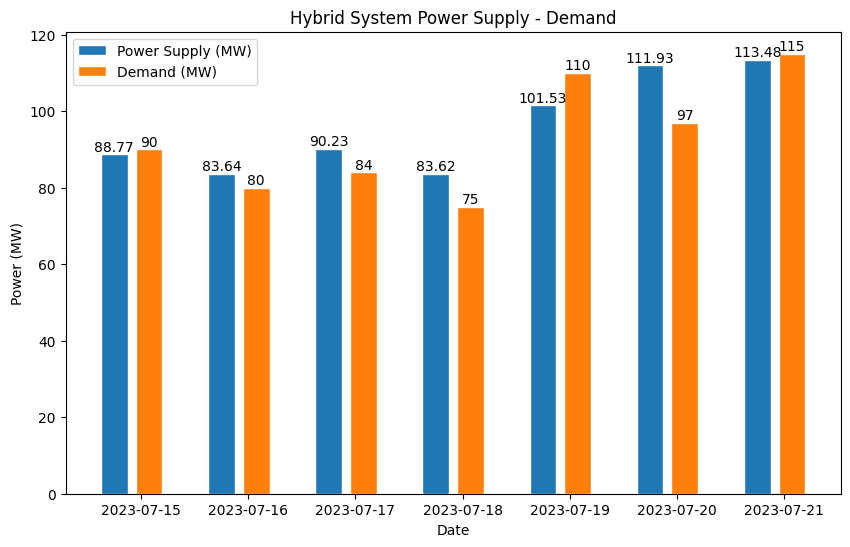

In [41]:
bar_width = 0.25
r1 = np.arange(len(LoadBalance))
r2 = [x + 1.3*bar_width for x in r1]
fig = plt.figure(figsize = (10,6))

plt.bar(r1, LoadBalance.iloc[:,0], width=bar_width, edgecolor='white', label='Power Supply (MW)')
plt.bar(r2, LoadBalance.iloc[:,1], width=bar_width, edgecolor='white', label='Demand (MW)')

for i, value in enumerate(LoadBalance.iloc[:,0]):
    plt.text(i, value, str(round(value,2)), ha='center', va='bottom')
for i, value in enumerate(LoadBalance.iloc[:,1]):
    plt.text(i + 1.3*bar_width, value, str(round(value,2)), ha='center', va='bottom')

plt.xlabel("Date")
plt.ylabel("Power (MW)")
plt.title("Hybrid System Power Supply - Demand")
plt.xticks([r + bar_width for r in range(len(LoadBalance.index))], LoadBalance.index)
plt.legend()
plt.show()